In [1]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Amazon_Reviews.ipynb')

--2022-04-23 18:31:25--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-04-23 18:31:25 (34.0 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Amazon_Reviews.ipynb to pdf
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] S

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

## Installing libaries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade spacy

     |████████████████████████████████| 6.0 MB 6.9 MB/s 
     |████████████████████████████████| 653 kB 38.6 MB/s 
     |████████████████████████████████| 10.1 MB 22.7 MB/s 
     |████████████████████████████████| 457 kB 34.2 MB/s 
     |████████████████████████████████| 181 kB 10.0 MB/s 
     |████████████████████████████████| 42 kB 604 kB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 5.9 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!pip install wordcloud

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 8.8 MB/s 
     |████████████████████████████████| 462 kB 48.8 MB/s 


In [ ]:
!pip install transformers[sentencepiece]
!pip install wget
!pip install datasets 

     |████████████████████████████████| 4.0 MB 15.5 MB/s 
     |████████████████████████████████| 596 kB 53.1 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 6.6 MB 49.4 MB/s 
     |████████████████████████████████| 895 kB 52.3 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9cd8596a53a584f924667148bf961bdbd49a944c28e965465675cd01e3c11076
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 325 kB 15.0 MB/s 
     |████████████████████████████████| 212 kB 51.4 MB/s 
     |████████████████████████████████| 136 kB 58.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.8 MB/s 

## Imports

In [ ]:
import sklearn.model_selection
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
import seaborn as sns 
from google.colab import files
import io
from IPython.display import HTML
import re
import spacy
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import random
import wget
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
import keras
import en_core_web_lg
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
% matplotlib inline
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler

##Load Data Set

In [ ]:
#Load the amazon review data
raw_df =  pd.read_csv('drive/MyDrive/processed_reviews_split_surnamesK_minimal.csv')

In [ ]:
raw_df

,review_id,text,verified,review_score,product_category
0,product_review_000000,"Though this game is still very good, it's can'...",False,3.0,video_games
1,product_review_000001,best game everust like being on the field. th...,True,5.0,video_games
2,product_review_000002,"Battlefield One is a great game, it offers a l...",True,-1.0,video_games
3,product_review_000003,No doubt there will be improvements in portabl...,False,5.0,NaN
4,product_review_000004,This is my first Animal Crossing game so go ea...,False,4.0,video_games
...,...,...,...,...,...
32913,product_review_032913,It will make a child happy. It is good for the...,True,4.0,musical_instruments
32914,product_review_032914,Sweat!!.,True,4.0,video_games
32915,product_review_032915,No brainer - tons of new stuff and days of add...,True,5.0,video_games
32916,product_review_032916,I got this game because I like sid meier's oth...,True,4.0,video_games


# Pre processing

## Data Cleaning

In [ ]:
#Convert text to lower case
raw_df['text'] = raw_df['text'].str.lower()

## Data Quality Assesment

In [ ]:
#Check data types
print('---------------Information about the dataset----------------\n')
print(raw_df.info())

#Change review_score data type to int
raw_df['review_score']=raw_df['review_score'].astype(int)
print(raw_df.info())

# Find Duplicate value count
print('---------------Duplicated values----------------\n')
print('Duplicated values:',raw_df.duplicated().sum())

---------------Information about the dataset----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         32918 non-null  object 
 1   text              32907 non-null  object 
 2   verified          32798 non-null  object 
 3   review_score      32918 non-null  float64
 4   product_category  32012 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         32918 non-null  object
 1   text              32907 non-null  object
 2   verified          32798 non-null  object
 3   review_score      32918 non-null  int64 
 4   product_category  32012 non-null  object
dtypes: int64(

## Exploratory Data Analysis

In [ ]:
#print details of the dataframe
def pretty_print_df(value_counts_):
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [ ]:
#Find no of rows and columns in the dataset
print('---------------Number of rows and columns in the dataset---------------\n')
print(raw_df.shape)
#Find all column names
print('------------------------------Column names-----------------------------\n')
print(raw_df.columns)
#Find the datatype of each column
print('--------------------------------Data types-----------------------------\n')
print(raw_df.dtypes)
#Print first 10 rows
print('----------------------First 10 rows in the dataset---------------------\n')
print(raw_df.head(10))
#Find the mean, max and other numarical calculation in numerical data columns
print('------------------Stastical information of the dataset--- -------------\n')
print(raw_df.describe())
print(raw_df.groupby('product_category').describe())

# Find Missing data value count 
print('---------------------------Missing value counts------------------------\n')
print('\nMissing values\n')
print(raw_df.isnull().sum())

df = raw_df.copy()

#Identify the missing data and invalid data
raw_df['excluded'] = 0
raw_df['reason_for_exclusion'] = '' 
raw_df.loc[raw_df['review_score']>5 , 'excluded'] = 1
raw_df.loc[raw_df['review_score']>5 , 'reason_for_exclusion'] = "invalid"
raw_df.loc[pd.isnull(raw_df['text']), 'excluded'] = 1
raw_df.loc[pd.isnull(raw_df['text']), 'reason_for_exclusion'] = "missing_value_or_label"
raw_df.loc[pd.isnull(raw_df['product_category']), 'excluded'] = 1
raw_df.loc[pd.isnull(raw_df['product_category']), 'reason_for_exclusion'] = "missing_value_or_label"
raw_df.loc[pd.isnull(raw_df['verified']), 'excluded'] = 1
raw_df.loc[pd.isnull(raw_df['verified']), 'reason_for_exclusion'] = "missing_value_or_label"
raw_df.loc[raw_df['excluded']==0, 'reason_for_exclusion'] = "N/A"

# List of categorical features
print('-----------------------Category value exploration----------------------\n')
categorical_columns= ['review_score', 'product_category', 'verified']
for col in categorical_columns:
  print(f"'{col}' categories and it's number of occurrences'")
  pretty_print_df(raw_df[col].value_counts())
  print()

for val in df['product_category'].unique():
  print(f"'{val}' Category: review score")
  pretty_print_df(df[(df['product_category']==val)]['review_score'].value_counts())
  print()

# Write to all value to csv file with catagory of excluder or not
raw_df.drop(['text','verified','review_score','product_category'],inplace=True, axis=1)
raw_df.rename(columns = {'review_id':'data_id'},inplace=True)
raw_df.to_csv('drive/MyDrive/exclusions_dataset_task4.csv',index=False)


---------------Number of rows and columns in the dataset---------------

(32918, 5)
------------------------------Column names-----------------------------

Index(['review_id', 'text', 'verified', 'review_score', 'product_category'], dtype='object')
--------------------------------Data types-----------------------------

review_id           object
text                object
verified            object
review_score         int64
product_category    object
dtype: object
----------------------First 10 rows in the dataset---------------------

               review_id                                               text  \
0  product_review_000000  though this game is still very good, it's can'...   
1  product_review_000001  best game everust like being on the field.  th...   
2  product_review_000002  battlefield one is a great game, it offers a l...   
3  product_review_000003  no doubt there will be improvements in portabl...   
4  product_review_000004  this is my first animal crossing g

,review_score
5,19270
4,6186
3,3162
1,1850
2,1543
-1,907



'product_category' categories and it's number of occurrences'


,product_category
video_games,21778
musical_instruments,10234



'verified' categories and it's number of occurrences'


,verified
True,23333
False,9465



'video_games' Category: review score


,review_score
5,11996
4,4214
3,2290
1,1469
2,1166
-1,643



'nan' Category: review score


,review_score



'musical_instruments' Category: review score


,review_score
5,6722
4,1807
3,771
2,336
1,335
-1,263


## Handling Missing value

In [ ]:
#Remove missing value and incorrect values
df = df.loc[df['review_score'] > 0]
df = df.loc[df['review_score'] <= 5]
df.dropna(axis = 0, how ='any', inplace=True)
print('------------------------Handling missing values------------------------\n')
print(df.isnull().sum())

------------------------Handling missing values------------------------

review_id           0
text                0
verified            0
review_score        0
product_category    0
dtype: int64


## Text Cleaning

In [ ]:
#Fix the word to correct format
def decontracted(sentence):
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can\'t", "can not", sentence)
  sentence = re.sub(r"n\'t", " not", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'s", " is", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'t", " not", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'m", " am", sentence)
  return sentence

In [ ]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_lg')

def textcleaning(column):
  tk = decontracted(column)
  # Remove stopword, punctuations, tokenization and lemmatization
  col2 = [w.lemma_ for w in nlp(tk)if not (w.is_stop) or (w.is_punct)]
  return (" ".join(col2))


In [ ]:
df['text'] = df['text'].apply(lambda x: textcleaning(x))

In [ ]:
#Remove html tags
df['text']=df['text'].replace(r'<[^<>]*>', '', regex=True)
#Remove special characters
df['text']=df['text'].replace(r'[^A-Za-z0-9 ]+', '', regex=True)
#Remove web tags
df['text']=df['text'].replace(r'{html}', '', regex=True)
#Remove web urls
df['text']=df['text'].replace(r'http\S+', '', regex=True)
#Remove numbers
df['text']=df['text'].replace(r'[0-9]+', '', regex=True)
#remove emails
df['text']=df['text'].replace(r'\S*@\S*\s?', '', regex=True)
#remove unnessary white spaces
df['text']=df['text'].replace(r'\s\s+', '', regex=True)
#Remove empty text rows
df = df.loc[df['text'] != '']

##EDA for Text data

In [ ]:
#Seperate tokens by product category
nltk.download('punkt')
token_lengths= []
all_tokens =[]
video_games_tokens = []
musical_instruments_tokens= []
for item in df.values:
  token_lengths.append(len(item[1]))
  tokens = nltk.word_tokenize(item[1])
  all_tokens.append(tokens)
  if(item[4]=='video_games'):
    video_games_tokens.append(tokens)
  else:
    musical_instruments_tokens.append(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print('------------------------Token length exploration------------------------\n')
print('Minimum number of tokens: ', np.min((token_lengths)))
print('Maximum number of tokens: ', np.max(token_lengths))

------------------------Token length exploration------------------------

Minimum number of tokens:  1
Maximum number of tokens:  14614


In [ ]:
def tokenize_as_is(x):
  return x

# define a function to get the most frequent ngrams
def get_top_ngram(spacy_tokenized_corpus, ngram_range=(2,2), top_n= 50):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    # get a vector for each document
    bag_of_words = vec.transform(spacy_tokenized_corpus)
    vec2 = CountVectorizer(ngram_range=ngram_range, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    print(f"\n The number of features in the vocabulary is {len(vec2.get_feature_names_out())}")
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return bag_of_words, words_freq

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



 The number of features in the vocabulary is 874542


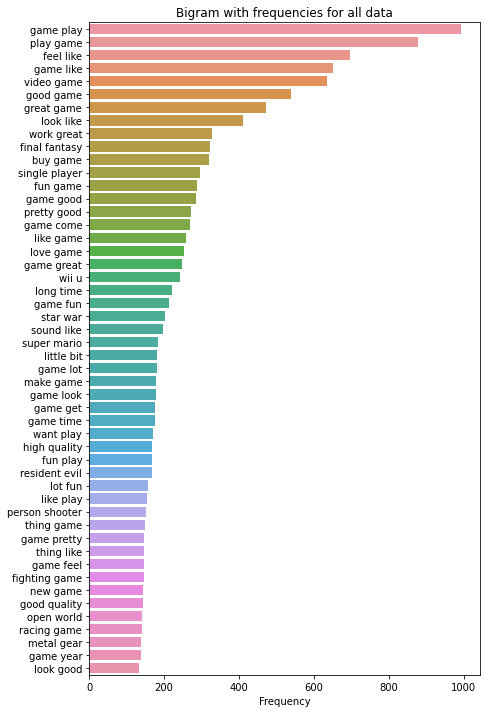

In [ ]:
#Most frequent bigram for all tokens in the dataset
bag_of_words, words_freq= get_top_ngram(all_tokens, ngram_range=(2,2), top_n= 50) 
# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for all data")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



 The number of features in the vocabulary is 718440


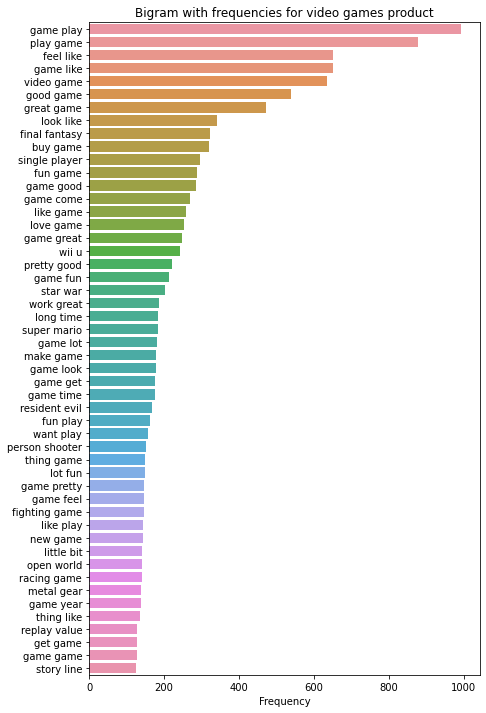

In [ ]:
#Most frequent bigram for video games tokens
bag_of_words, words_freq= get_top_ngram(video_games_tokens, ngram_range=(2,2), top_n= 50) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for video games product")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



 The number of features in the vocabulary is 168060


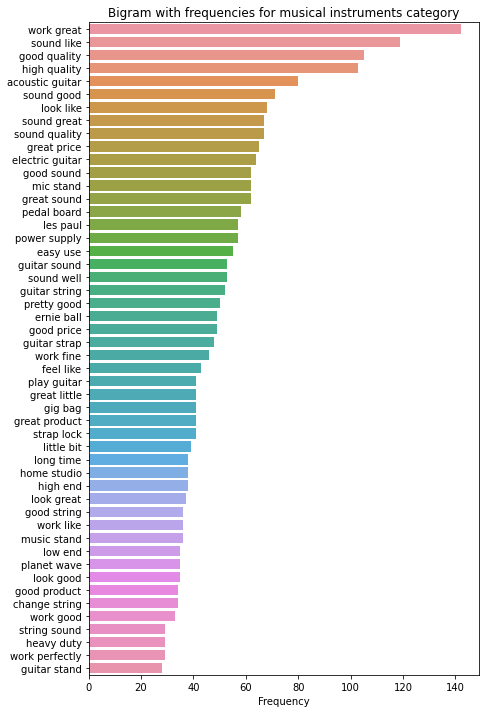

In [ ]:
#Most frequent bigram for musical instruments tokens
bag_of_words, words_freq= get_top_ngram(musical_instruments_tokens, ngram_range=(2,2), top_n= 50) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for musical instruments category")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)

In [ ]:
#product categoy dataset filteration
df_video = df[(df['product_category']=='video_games')]
df_musical = df[(df['product_category'] == 'musical_instruments')]

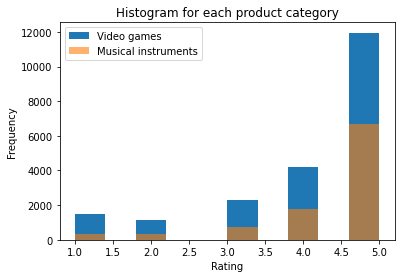

In [ ]:
#Histogram for each product_category 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Histogram for each product category")
ax.hist(df_video['review_score'], range=[1,5])
ax.hist(df_musical['review_score'],range=[1,5], alpha=0.6)
ax.set_xlabel('Rating')
_ =ax.set_ylabel('Frequency')
_= ax.legend(['Video games','Musical instruments'])

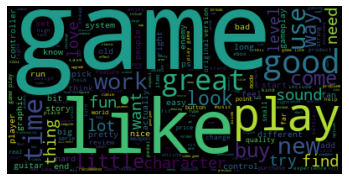

In [ ]:
#Visualizing the most frequent words for the whole dataset
stops = nlp.Defaults.stop_words
wordcloud = WordCloud(stopwords=stops).generate(' '.join(df['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

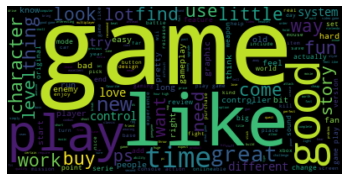

In [ ]:
#Visualizing the most frequent words for the video games product category
wordcloud = WordCloud(stopwords=stops).generate(' '.join(df[df['product_category']=='video_games']['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

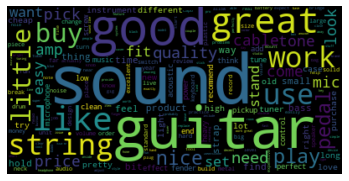

In [ ]:
#Visualizing the most frequent words for the musical instruments product category
wordcloud = WordCloud(stopwords=stops).generate(' '.join(df[df['product_category']=='musical_instruments']['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Encoding, Sampling, and Splitting

In [ ]:
df.to_csv('drive/MyDrive/cleaned.csv',index=False)

In [ ]:
df =  pd.read_csv('drive/MyDrive/cleaned.csv')

In [ ]:
# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()   
#Encoded the product category and review score target attributes
df['product_category'] = lblEncoder_Y.fit_transform(df['product_category']) 
df['review_score'] = lblEncoder_Y.fit_transform(df['review_score']) 

In [ ]:
# Oversampling the review score attribute
oversample = SMOTE()
df.reset_index(drop=True, inplace=True)
df_index = np.array(df.index.to_series()).reshape(-1, 1)
y_review = np.array(df['review_score']).reshape(-1, 1)

X_score,y_score = oversample.fit_resample(df_index,y_review)

train_score = pd.DataFrame(columns=['text','review_score', 'product_category'])
train_score['text'] = df.loc[X_score.flatten()]['text']
train_score['review_score'] = y_score
train_score['product_category'] = df.loc[X_score.flatten()]['product_category']


In [ ]:
# function for oversampling
def sampling(X,Y):
  oversample = RandomOverSampler(sampling_strategy=0.8)
  X_over, y_over = oversample.fit_resample(X,Y)
  return X_over, y_over 

In [ ]:
# Oversampling the product category attribute
X_ctg,y_ctg = sampling(np.array(train_score['text']).reshape(-1, 1),np.array(train_score['product_category']).reshape(-1, 1))
y1,y2 = sampling(np.array(train_score['review_score']).reshape(-1, 1),np.array(train_score['product_category']).reshape(-1, 1))
temp = np.concatenate((X_ctg,y1,y_ctg.reshape(-1, 1) ), axis=1)
train_ctg = pd.DataFrame(temp,columns=['text','review_score', 'product_category'])

In [ ]:
categorical_columns= ['review_score','product_category']
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_ctg[col].value_counts())
  print()

Categories and number of occurrences for 'review_score'


,review_score
4,23636
3,22929
1,22890
0,22783
2,22771



Categories and number of occurrences for 'product_category'


,product_category
1,63894
0,51115


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(train_ctg[['text']])
Y = np.array(train_ctg[['product_category','review_score']])
# Split the data for training, testing and validating 
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,Y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.15, shuffle=True, random_state=0)

In [ ]:
#Combine X and Y values as a dataframe to form train, test and valid datasets
temp1 = np.concatenate((X_train,y_train ), axis=1)
train = pd.DataFrame(temp1, columns = ['text','product_category','review_score',])
temp2 = np.concatenate((X_valid,y_valid ), axis=1)
valid = pd.DataFrame(temp2, columns = ['text','product_category','review_score',])
temp3 = np.concatenate((X_test,y_test ), axis=1)
test = pd.DataFrame(temp3, columns = ['text','product_category','review_score',])

train_ctg = train.copy()
valid_ctg = valid.copy()
train_score = train.copy()
valid_score = valid.copy()

# ML Methodology

## Neural Network

In [ ]:
def get_confusion_matrix(dataset_, y_true,model):
  # get the predicted results
  prob_pred = model.predict(dataset_)
  # get the highest probability
  y_pred= np.argmax(prob_pred, axis=1)
  # get the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  return cm

def get_metrics(dataset_, y_true, model):
  # get the predicted results
  prob_pred = model.predict(dataset_)
  # get the highest probability
  y_pred= np.argmax(prob_pred, axis=1)
  # get the confusion matrix
  p = precision_score(y_true, y_pred, average='macro')
  r = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')
  a = accuracy_score(y_true, y_pred)
  return (p, r, f1, a)


In [ ]:
#function for creating the loss and accuracy variation graph
def get_loss_accuracy(history,epocs):
  #Loss variation accoding to the number of epochs
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,epocs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  #Accuracy variation accoding to the number of epochs
  acc_train = history.history['acc']
  acc_val = history.history['val_acc']
  epochs = range(1,epocs+1)
  plt.plot(epochs, acc_train, 'g', label='Training loss')
  plt.plot(epochs, acc_val, 'b', label='validation loss')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()


###Product category Prediction

In [ ]:
#Make each data to equal length
batch_size_ctg = 258
#Vectorization
vectorizer_ctg = TextVectorization(output_sequence_length=batch_size_ctg) 
#Converted to the multiple elements
text_ds_ctg = tf.data.Dataset.from_tensor_slices(train_ctg['text']).batch(batch_size_ctg)
#Computes the vocabulary
vectorizer_ctg.adapt(text_ds_ctg)

In [ ]:
#Create dictonary
voc_ctg = vectorizer_ctg.get_vocabulary()
word_index_ctg = dict(zip(voc_ctg, range(len(voc_ctg))))

In [ ]:
#Generate the embedding matrix
num_tokens_ctg = len(voc_ctg)
embedding_dim_ctg = len(nlp('game').vector)
embedding_matrix_ctg = np.zeros((num_tokens_ctg, embedding_dim_ctg))
# Added the embed all tokens one by one
for token, i in word_index_ctg.items():
    embedding_matrix_ctg[i] = nlp(str(token)).vector
print('Done the embeddings')


Done the embeddings


In [ ]:
#Creating the Embedding layer
embedding_layer_ctg = Embedding(
    num_tokens_ctg,
    embedding_dim_ctg,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix_ctg),
    trainable=True,
)

In [ ]:
#Build the model 
int_sequences_input_ctg = keras.Input(shape=(None,), dtype="int64")
embedded_sequences_ctg = embedding_layer_ctg(int_sequences_input_ctg)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(embedded_sequences_ctg)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds_ctg = layers.Dense(2, activation="softmax")(x)
model_ctg = keras.Model(int_sequences_input_ctg, preds_ctg)
model_ctg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         83687100  
                                                                 
 conv1d_9 (Conv1D)           (None, None, 64)          96064     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, None, 64)          20544     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, None, 64)         0         
 1D)                                                       

In [ ]:
# vectorize the input
x_train_ctg = vectorizer_ctg(np.array([[s] for s in train_ctg['text']])).numpy()
x_val_ctg = vectorizer_ctg(np.array([[s] for s in valid_ctg['text']])).numpy()
x_test_ctg = vectorizer_ctg(np.array([[s] for s in test['text']])).numpy()

Y_train_ctg = np.asarray(train_ctg['product_category']).astype(int)
Y_valid_ctg = np.array(valid_ctg['product_category']).astype(int)
Y_test_ctg = np.array(test['product_category']).astype(int)

# create a tensorflow dataset
train_dataset_ctg = tf.data.Dataset.from_tensor_slices((x_train_ctg, Y_train_ctg))
val_dataset_ctg = tf.data.Dataset.from_tensor_slices((x_val_ctg, Y_valid_ctg))
test_dataset_ctg = tf.data.Dataset.from_tensor_slices((x_test_ctg, Y_test_ctg))

# batch the dataset
train_dataset_ctg = train_dataset_ctg.batch(batch_size_ctg)
val_dataset_ctg = val_dataset_ctg.batch(batch_size_ctg)
test_dataset_ctg = test_dataset_ctg.batch(batch_size_ctg)

In [ ]:
epocs_ctg = 10
#Optimizer
opt = SGD(learning_rate=0.05)
model_ctg.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, 
    metrics=["acc"]
)
#Train the model
history_ctg = model_ctg.fit(train_dataset_ctg, epochs=epocs_ctg, validation_data=val_dataset_ctg)

Epoch 1/10
342/342 [==============================] - 370s 1s/step - loss: 0.3693 - acc: 0.8186 - val_loss: 1.0388 - val_acc: 0.6750
Epoch 2/10
342/342 [==============================] - 374s 1s/step - loss: 0.1894 - acc: 0.9187 - val_loss: 0.2137 - val_acc: 0.9051
Epoch 3/10
342/342 [==============================] - 367s 1s/step - loss: 0.1546 - acc: 0.9366 - val_loss: 0.1497 - val_acc: 0.9344
Epoch 4/10
342/342 [==============================] - 368s 1s/step - loss: 0.1342 - acc: 0.9467 - val_loss: 0.1305 - val_acc: 0.9436
Epoch 5/10
342/342 [==============================] - 362s 1s/step - loss: 0.1186 - acc: 0.9547 - val_loss: 0.1179 - val_acc: 0.9512
Epoch 6/10
342/342 [==============================] - 360s 1s/step - loss: 0.1066 - acc: 0.9604 - val_loss: 0.0931 - val_acc: 0.9634
Epoch 7/10
342/342 [==============================] - 361s 1s/step - loss: 0.0934 - acc: 0.9662 - val_loss: 0.0934 - val_acc: 0.9623
Epoch 8/10
342/342 [==============================] - 366s 1s/step - 

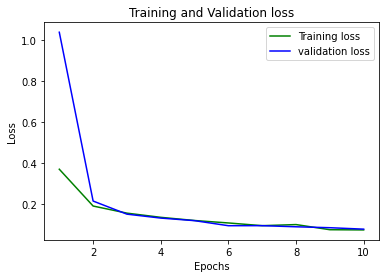

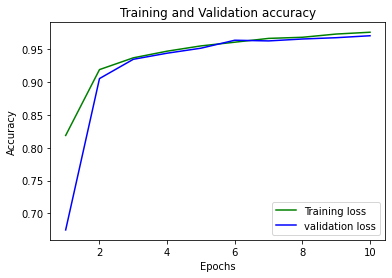

In [ ]:
get_loss_accuracy(history_ctg,epocs_ctg)

Training
(precision, recall, f1, accuracy)
(0.9738491937428612, 0.976801658879522, 0.9750816793712802, 0.9753242177288278)
Validation
(precision, recall, f1, accuracy)
(0.9689259272015568, 0.9713525520536829, 0.969937970739208, 0.9701809750756746)
Validation
(precision, recall, f1, accuracy)
(0.9647525849503542, 0.9670871531978191, 0.9656892389926068, 0.9659160073037127)


Text(0.5, 1.0, 'Test CM')

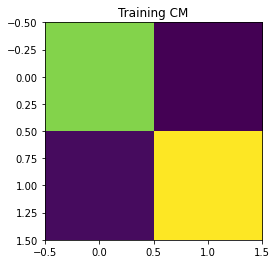

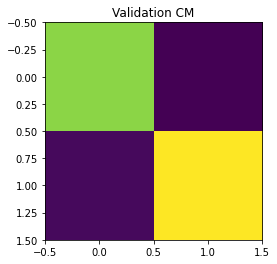

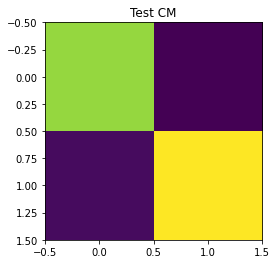

In [ ]:
# compute confusion matrices
train_cm_ctg = get_confusion_matrix(train_dataset_ctg, Y_train_ctg,model_ctg)
val_cm_ctg = get_confusion_matrix(val_dataset_ctg, Y_valid_ctg,model_ctg)
test_cm_ctg = get_confusion_matrix(test_dataset_ctg, Y_test_ctg,model_ctg)
# compute metrics
train_metrics_ctg = get_metrics(train_dataset_ctg, Y_train_ctg,model_ctg)
val_metrics_ctg = get_metrics(val_dataset_ctg, Y_valid_ctg,model_ctg)
test_metrics_ctg = get_metrics(test_dataset_ctg, Y_test_ctg,model_ctg)

print('Training\n(precision, recall, f1, accuracy)')
print(train_metrics_ctg)
print('Validation\n(precision, recall, f1, accuracy)')
print(val_metrics_ctg)
print('Validation\n(precision, recall, f1, accuracy)')
print(test_metrics_ctg)

plt.figure()
plt.imshow(train_cm_ctg)
plt.title('Training CM')
plt.figure()
plt.imshow(val_cm_ctg)
plt.title('Validation CM')
plt.figure()
plt.imshow(test_cm_ctg)
plt.title('Test CM')

### Review score Prediction

In [ ]:
#Make each data to equal length
batch_size_score = 256
#Vectorization
vectorizer_score = TextVectorization(output_sequence_length=batch_size_score) 
#Converted to the multiple elements
text_ds_score = tf.data.Dataset.from_tensor_slices(train_score['text']).batch(batch_size_score)

#Computes the vocabulary
vectorizer_score.adapt(text_ds_score)
voc_score = vectorizer_score.get_vocabulary()
#Create the dictionary
word_index_score = dict(zip(voc_score, range(len(voc_score))))

#Generate the embedding matrix
num_tokens_score = len(voc_score)
embedding_dim_score = len(nlp('game').vector)
embedding_matrix_score = np.zeros((num_tokens_score, embedding_dim_score))
# Added the embed all tokens one by one
for token, i in word_index_score.items():
    embedding_matrix_score[i] = nlp(str(token)).vector

In [ ]:
#Creating the Embedding layer
embedding_layer_score= Embedding(
    num_tokens_score,
    embedding_dim_score,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix_score),
    trainable=True,
)

In [ ]:
#Build the model
int_sequences_input_score = keras.Input(shape=(None,), dtype="int64")
embedded_sequences_score = embedding_layer_score(int_sequences_input_score)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(embedded_sequences_score)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(64, 5, padding="SAME", activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds_score = layers.Dense(5, activation="softmax")(x)
model_score = keras.Model(int_sequences_input_score, preds_score)
model_score.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         83645700  
                                                                 
 conv1d (Conv1D)             (None, None, 64)          96064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                         

In [ ]:
# vectorize the input
x_train_score = vectorizer_score(np.array([[s] for s in train_score['text']])).numpy()
x_val_score = vectorizer_score(np.array([[s] for s in valid_score['text']])).numpy()
x_test_score = vectorizer_score(np.array([[s] for s in test['text']])).numpy()

Y_train_score = train_score['review_score'].values.astype(int)
Y_valid_score = valid_score['review_score'].values.astype(int)
Y_test_score = test['review_score'].values.astype(int)

# create a tensorflow dataset
train_dataset_score = tf.data.Dataset.from_tensor_slices((x_train_score, Y_train_score))
val_dataset_score = tf.data.Dataset.from_tensor_slices((x_val_score, Y_valid_score))
test_dataset_score = tf.data.Dataset.from_tensor_slices((x_test_score, Y_test_score))

# batch the dataset
train_dataset_score = train_dataset_score.batch(batch_size_score)
val_dataset_score = val_dataset_score.batch(batch_size_score)
test_dataset_score = test_dataset_score.batch(batch_size_score)

In [ ]:
epocs_score = 10
#Optimizer
opt = SGD(learning_rate=0.05)

model_score.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, 
    metrics=["acc"]
)
#Train the model
history_score = model_score.fit(train_dataset_score, epochs=epocs_score, validation_data=val_dataset_score)


Epoch 1/10
344/344 [==============================] - 443s 1s/step - loss: 1.6082 - acc: 0.2154 - val_loss: 1.6065 - val_acc: 0.2251
Epoch 2/10
344/344 [==============================] - 437s 1s/step - loss: 1.6064 - acc: 0.2213 - val_loss: 1.6060 - val_acc: 0.2273
Epoch 3/10
344/344 [==============================] - 429s 1s/step - loss: 1.6056 - acc: 0.2232 - val_loss: 1.6056 - val_acc: 0.2269
Epoch 4/10
344/344 [==============================] - 426s 1s/step - loss: 1.6048 - acc: 0.2252 - val_loss: 1.6049 - val_acc: 0.2307
Epoch 5/10
344/344 [==============================] - 434s 1s/step - loss: 1.6035 - acc: 0.2282 - val_loss: 1.6045 - val_acc: 0.2335
Epoch 6/10
344/344 [==============================] - 430s 1s/step - loss: 1.6024 - acc: 0.2312 - val_loss: 1.6036 - val_acc: 0.2328
Epoch 7/10
344/344 [==============================] - 428s 1s/step - loss: 1.6001 - acc: 0.2365 - val_loss: 1.6023 - val_acc: 0.2405
Epoch 8/10
344/344 [==============================] - 431s 1s/step - 

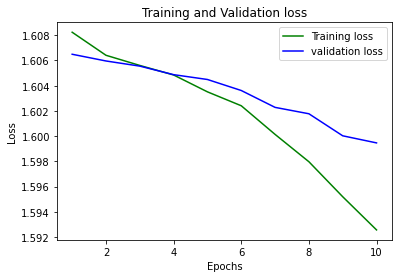

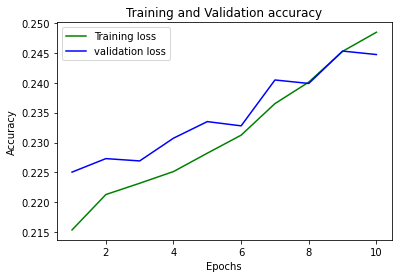

In [ ]:
get_loss_accuracy(history_score,epocs_score)

Training
(precision, recall, f1, accuracy)
(0.2784145336848005, 0.258889664496852, 0.19953284344268407, 0.2615435318718534)
Validation
(precision, recall, f1, accuracy)
(0.24593971133005854, 0.23689259691261375, 0.18369390127401494, 0.24470345804623608)
Test
(precision, recall, f1, accuracy)
(0.24686807263075305, 0.23951629150506054, 0.18439061719754898, 0.24298009214987396)


Text(0.5, 1.0, 'Test CM')

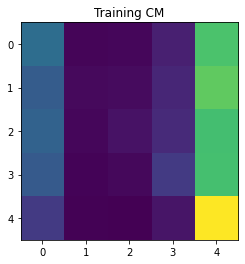

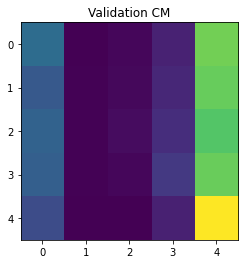

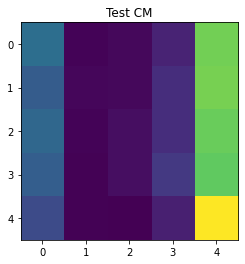

In [ ]:
# compute confusion matrices
train_cm_score = get_confusion_matrix(train_dataset_score, Y_train_score,model_score)
val_cm_score = get_confusion_matrix(val_dataset_score, Y_valid_score,model_score)
test_cm_score = get_confusion_matrix(test_dataset_score, Y_test_score,model_score)
# compute metrics
train_metrics_score = get_metrics(train_dataset_score, Y_train_score,model_score)
val_metrics_score = get_metrics(val_dataset_score, Y_valid_score,model_score)
test_metrics_score = get_metrics(test_dataset_score, Y_test_score,model_score)

print('Training\n(precision, recall, f1, accuracy)')
print(train_metrics_score)
print('Validation\n(precision, recall, f1, accuracy)')
print(val_metrics_score)
print('Test\n(precision, recall, f1, accuracy)')
print(test_metrics_score)

plt.figure()
plt.imshow(train_cm_score)
plt.title('Training CM')
plt.figure()
plt.imshow(val_cm_score)
plt.title('Validation CM')
plt.figure()
plt.imshow(test_cm_score)
plt.title('Test CM')

##MultinomialNB

In [ ]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2))
tfidf_vect_ngram.fit(df['text'])
df_all = pd.DataFrame(columns=['text', 'review_score', 'product_category'])

In [ ]:
def get_metrics_nb(y_true, y_pred):
  p = precision_score(y_true, y_pred, average='macro')
  r = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')
  a = accuracy_score(y_true, y_pred)
  return (p,r,f1,a)

### Predict review score

In [ ]:
# Vectorize the text reviews
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_score['text'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_score['text'])
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test['text'])

# Create Multinomial Model
nb = naive_bayes.MultinomialNB(alpha = 0.6)
#Train the model
model_nb_score = nb.fit(xtrain_tfidf_ngram, train_score['review_score'].astype('int'))
#Predict the review score using validation set
pred = model_nb_score.predict(xvalid_tfidf_ngram)
#Calculate the accuracy and f1 score for validation set
acc_score_val = accuracy_score(valid_score['review_score'].astype('int'),pred)
score_score_val = f1_score(valid_score['review_score'].astype('int'),pred, average='weighted')

print('--------------------------Validation Results---------------------------\n')
print('Validation accuracy: ', acc_score_val)
print("Validation Weighted F score: ",score_score_val)

#Predict the review score using test set
test_pred = model_nb_score.predict(xtest_tfidf_ngram)
df_all['review_score'] = test_pred
df_all['text'] = test['text']

#Calculate the accuracy and f1 score for test set
acc_score_test = accuracy_score(test['review_score'].astype('int'),test_pred)
score_score_test = f1_score(test['review_score'].astype('int'),test_pred, average='weighted')

print('\n-----------------------------Test Results------------------------------\n')
print('Test accuracy: ', acc_score_test)
print("Validation Weighted F score: ",score_score_test)


--------------------------Validation Results---------------------------

Validation accuracy:  0.2816021636937343
Validation Weighted F score:  0.2823000052294629

-----------------------------Test Results------------------------------

Test accuracy:  0.2862731461357907
Validation Weighted F score:  0.286761691137294


Training
(precision, recall, f1, accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.192093087696911, 0.07344776185095572, 0.1061501675600014, 0.1858329639857716)
Validation
(precision, recall, f1, accuracy)
(0.18860271852196162, 0.07205710550957267, 0.10419140618771434, 0.18256165883186296)
Test
(precision, recall, f1, accuracy)
(0.19198036006546643, 0.07348953796115021, 0.10600061601507257, 0.18569068938537772)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Test CM')

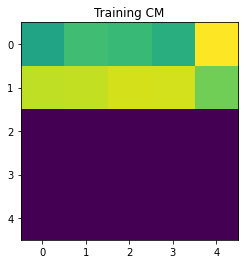

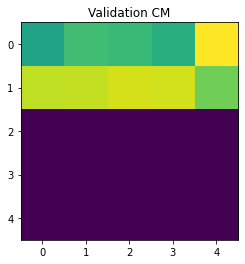

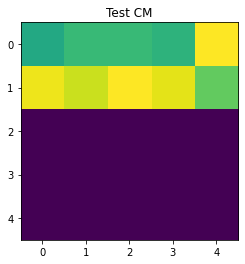

In [ ]:
pred_score_train =  model_nb_score.predict(xtrain_tfidf_ngram)
train_cm_score = confusion_matrix(train_score['product_category'].astype('int'), pred_score_train)
valid_cm_score = confusion_matrix(valid_score['product_category'].astype('int'), pred)
test_cm_score = confusion_matrix(test['product_category'].astype('int'), test_pred)

print('Training\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(train_score['product_category'].astype('int'), pred_score_train))
print('Validation\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(valid_score['product_category'].astype('int'), pred))
print('Test\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(test['product_category'].astype('int'), test_pred))

plt.figure()
plt.imshow(train_cm_score)
plt.title('Training CM')
plt.figure()
plt.imshow(train_cm_score)
plt.title('Validation CM')
plt.figure()
plt.imshow(test_cm_score)
plt.title('Test CM')

###Predict category

In [ ]:
# Vectorize the text reviews
xtrain_tfidf_ngram_cat =  tfidf_vect_ngram.transform(train_ctg['text'])
xvalid_tfidf_ngram_cat =  tfidf_vect_ngram.transform(valid_ctg['text'])
xtest_tfidf_ngram_cat =  tfidf_vect_ngram.transform(test['text'])

# Create Multinomial Model
nb = naive_bayes.MultinomialNB(alpha = 0.6)
#Train the model
model_nb_ctg = nb.fit(xtrain_tfidf_ngram_cat, train_ctg['product_category'].astype('int'))
#Predict the review score using validation set
pred_ctg_val = model_nb_ctg.predict(xvalid_tfidf_ngram_cat)
#Calculate the accuracy and f1 score for validation set
acc_ctg_val = accuracy_score(valid_ctg['product_category'].astype('int'),pred_ctg_val)
score_ctg_val = f1_score(valid_ctg['product_category'].astype('int'),pred_ctg_val, average='weighted')

print('--------------------------Validation Results---------------------------\n')
print('Validation accuracy: ', acc_ctg_val)
print("Validation Weighted F score: ",score_ctg_val)

#Predict the review score using test set
pred_ctg_test = model_nb_ctg.predict(xtest_tfidf_ngram_cat)
df_all['product_category'] = pred_ctg_test
#Calculate the accuracy and f1 score for test set
acc_ctg_test = accuracy_score(test['product_category'].astype('int'),pred_ctg_test)
score_ctg_test = f1_score(test['product_category'].astype('int'),pred_ctg_test, average='weighted')

print('\n-----------------------------Test Results------------------------------\n')
print('Test accuracy: ', acc_ctg_test)
print("Validation Weighted F score: ",score_ctg_test)


--------------------------Validation Results---------------------------

Validation accuracy:  0.9805525146500097
Validation Weighted F score:  0.9805558348375013

-----------------------------Test Results------------------------------

Test accuracy:  0.9826132313309571
Validation Weighted F score:  0.9826147350373226


Training
(precision, recall, f1, accuracy)
(0.9887357398646919, 0.9885319042492197, 0.9886329316255671, 0.9887718341231689)
Validation
(precision, recall, f1, accuracy)
(0.980156445609454, 0.9804844587759401, 0.9803180264084106, 0.9805525146500097)
Test
(precision, recall, f1, accuracy)
(0.9822654552823444, 0.9824323204343575, 0.9823483910473274, 0.9826132313309571)


Text(0.5, 1.0, 'Test CM')

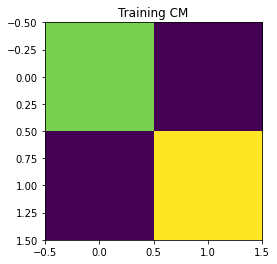

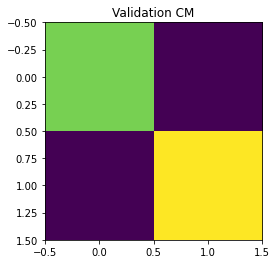

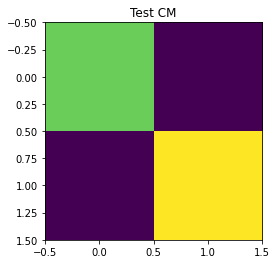

In [ ]:
pred_ctg_train =  model_nb_ctg.predict(xtrain_tfidf_ngram_cat)
train_cm_ctg = confusion_matrix(train_ctg['product_category'].astype('int'), pred_ctg_train)
valid_cm_ctg = confusion_matrix(valid_ctg['product_category'].astype('int'), pred_ctg_val)
test_cm_ctg = confusion_matrix(test['product_category'].astype('int'), pred_ctg_test)

print('Training\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(train_ctg['product_category'].astype('int'), pred_ctg_train))
print('Validation\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(valid_ctg['product_category'].astype('int'), pred_ctg_val))
print('Test\n(precision, recall, f1, accuracy)')
print(get_metrics_nb(test['product_category'].astype('int'), pred_ctg_test))

plt.figure()
plt.imshow(train_cm_ctg)
plt.title('Training CM')
plt.figure()
plt.imshow(valid_cm_ctg)
plt.title('Validation CM')
plt.figure()
plt.imshow(test_cm_ctg)
plt.title('Test CM')